### Object File : ../../data/02828884/1a40eaf5919b1b3f3eaa2b95b99dae6/models/model_normalized.obj

In [1]:
import numpy as np
import open3d as o3d
import matplotlib.pyplot as plt
import time

In [2]:
def capture_depth(vis):
        depth = vis.capture_depth_float_buffer()
        plt.imsave("../../results/02828884/1a40eaf5919b1b3f3eaa2b95b99dae6/depth/%s.png" % time.strftime("%Y%m%d%H%M%S"),np.asarray(depth), dpi = 1)
        plt.imshow(np.asarray(depth))
        plt.show()
        return True

In [3]:
def capture_image(vis):
        image = vis.capture_screen_float_buffer()
        plt.imsave("../../results/02828884/1a40eaf5919b1b3f3eaa2b95b99dae6/image/%s.png" % time.strftime("%Y%m%d%H%M%S"),np.asarray(image), dpi = 1)
        plt.imshow(np.asarray(image))
        plt.show()
        return True

In [4]:
def save_viewpoint(vis):
    param = vis.get_view_control().convert_to_pinhole_camera_parameters()
    o3d.io.write_pinhole_camera_parameters(\
        "../../results/02828884/1a40eaf5919b1b3f3eaa2b95b99dae6/camera/%s.json" % time.strftime("%Y%m%d%H%M%S"), param)
    return True

In [5]:
def rotate_view(vis,x,y):
        ctr = vis.get_view_control()
        ctr.rotate(x,y)
        return True

In [6]:
def translate_view(vis,x,y):
        ctr = vis.get_view_control()
        ctr.translate(x, y)
        return True

In [7]:
def generate_images(mesh):
    generate_images.index = -1
    generate_images.vis = o3d.visualization.Visualizer()

    def move_forward(vis):
        # This function is called within the o3d.visualization.Visualizer::run() loop
        # The run loop calls the function, then re-render
        # So the sequence in this function is to:
        # 1. Capture frame
        # 2. index++, check ending criteria
        # 3. Set camera
        # 4. (Re-render)
        ctr = vis.get_view_control()
        glb = generate_images
        if glb.index >= 0:
            capture_depth(vis)
            capture_image(vis)
            save_viewpoint(vis)
        glb.index = glb.index + 1
        if glb.index < 3:
            rotate_view(vis,10.0,0.0)
        else:
            generate_images.vis.register_animation_callback(None)
        return False

    vis = generate_images.vis
    vis.create_window()
    vis.add_geometry(mesh)
    vis.register_animation_callback(move_forward)
    vis.run()
    vis.destroy_window()

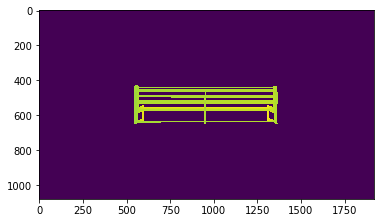

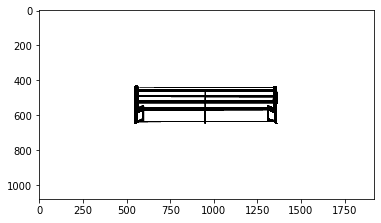

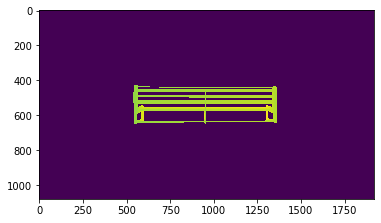

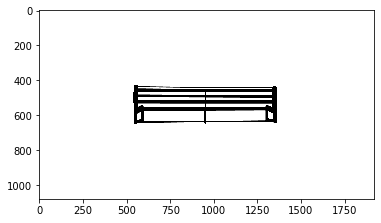

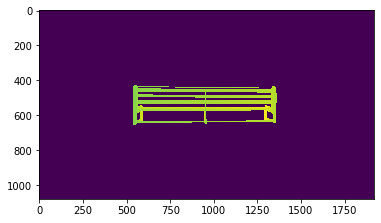

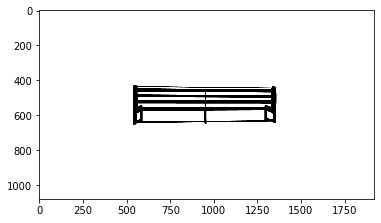

In [8]:
if __name__ == "__main__":
    mesh = o3d.io.read_triangle_mesh("../../data/02828884/1a40eaf5919b1b3f3eaa2b95b99dae6/models/model_normalized.obj")
    mesh.paint_uniform_color([0.0,0.0,0.0])
    
    generate_images(mesh)